In [38]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [39]:
df = pd.read_csv("stroke_data.csv")
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df = df.drop(df.index[df['age'] < 0])
df = df.head(35000)
df = df[['hypertension', 'avg_glucose_level', 'heart_disease', 'age', 'bmi', 'work_type', 'stroke']]

In [40]:

y = df['stroke']
X = df.drop(['stroke'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# scale the x values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [43]:

# instantiate the model
# logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg = LogisticRegression()


In [45]:
# tune hyperparameters with GridSearchCV
logreg_tuned = GridSearchCV(logreg, param_grid={'C': np.logspace(-3,3,7), 'penalty':['l2'], 'solver': ['liblinear']}, cv=10)

# fit the model
logreg_tuned.fit(X_train_scaled, y_train)

# Step 4: Evaluate the model
# p_pred = model.predict_proba(x)
y_pred = logreg_tuned.predict(X_test_scaled)
# score_ = model.score(x, y)
# conf_m = confusion_matrix(y, y_pred)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.57      0.65      0.61      2920
           1       0.72      0.65      0.69      4080

    accuracy                           0.65      7000
   macro avg       0.65      0.65      0.65      7000
weighted avg       0.66      0.65      0.65      7000



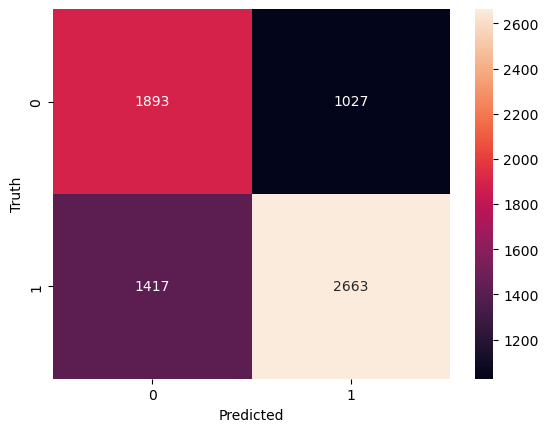

In [47]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()